In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('synthetic_logs.csv')

df.head()

,timestamp,source,log_message,target_label,complexity
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert


In [3]:
df['log_message'][1444]

'File data_4497.csv uploaded successfully by user User379.'

In [4]:
df['log_message'][82]

'nova.compute.resource_tracker [req-addc1839-2ed5-4778-b57e-5854eb7b8b09 - - - - -] Final resource view: name=cp-1.slowvm1.tcloud-pg0.utah.cloudlab.us phys_ram=64172MB used_ram=2560MB phys_disk=15GB used_disk=20GB total_vcpus=16 used_vcpus=1 pci_stats=[]'

In [5]:
df.shape

(2410, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   timestamp     2410 non-null   object
 1   source        2410 non-null   object
 2   log_message   2410 non-null   object
 3   target_label  2410 non-null   object
 4   complexity    2410 non-null   object
dtypes: object(5)
memory usage: 94.3+ KB


In [7]:
df.describe()   #include='all'

,timestamp,source,log_message,target_label,complexity
count,2410,2410,2410,2410,2410
unique,2407,6,2265,9,3
top,4/28/2025 20:42,ThirdPartyAPI,Backup completed successfully.,HTTP Status,bert
freq,2,496,60,1017,1903


In [8]:
src_list = df.source.unique() 
print(src_list)

['ModernCRM' 'AnalyticsEngine' 'ModernHR' 'BillingSystem' 'ThirdPartyAPI'
 'LegacyCRM']


In [9]:
print(df.source.value_counts())

source
ThirdPartyAPI      496
ModernHR           492
BillingSystem      479
AnalyticsEngine    471
ModernCRM          465
LegacyCRM            7
Name: count, dtype: int64


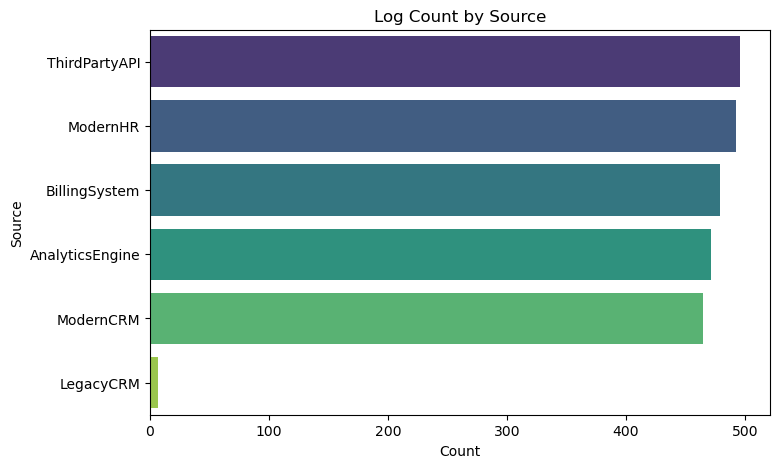

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, y='source', order=df['source'].value_counts().index, palette='viridis')
plt.title('Log Count by Source')
plt.xlabel('Count')
plt.ylabel('Source')
plt.show()


<h3>Here, since all have around 450+ entries except LegacyCRM, we will check the logs related to LegacyCRM in-depth.</h3>

Checking the number of different classes of log message from each source

In [11]:
for src in src_list:
    print("Source Name: ", src)
    print(df[df.source == src].target_label.value_counts(), '\n')

Source Name:  ModernCRM
target_label
HTTP Status            205
Security Alert          69
System Notification     67
Error                   39
Critical Error          31
Resource Usage          29
User Action             25
Name: count, dtype: int64 

Source Name:  AnalyticsEngine
target_label
HTTP Status            186
Security Alert          75
System Notification     65
Resource Usage          43
User Action             35
Error                   34
Critical Error          33
Name: count, dtype: int64 

Source Name:  ModernHR
target_label
HTTP Status            221
Security Alert          79
System Notification     61
Critical Error          36
Resource Usage          34
Error                   32
User Action             29
Name: count, dtype: int64 

Source Name:  BillingSystem
target_label
HTTP Status            195
System Notification     77
Security Alert          74
Error                   39
Resource Usage          36
User Action             31
Critical Error          27
Nam

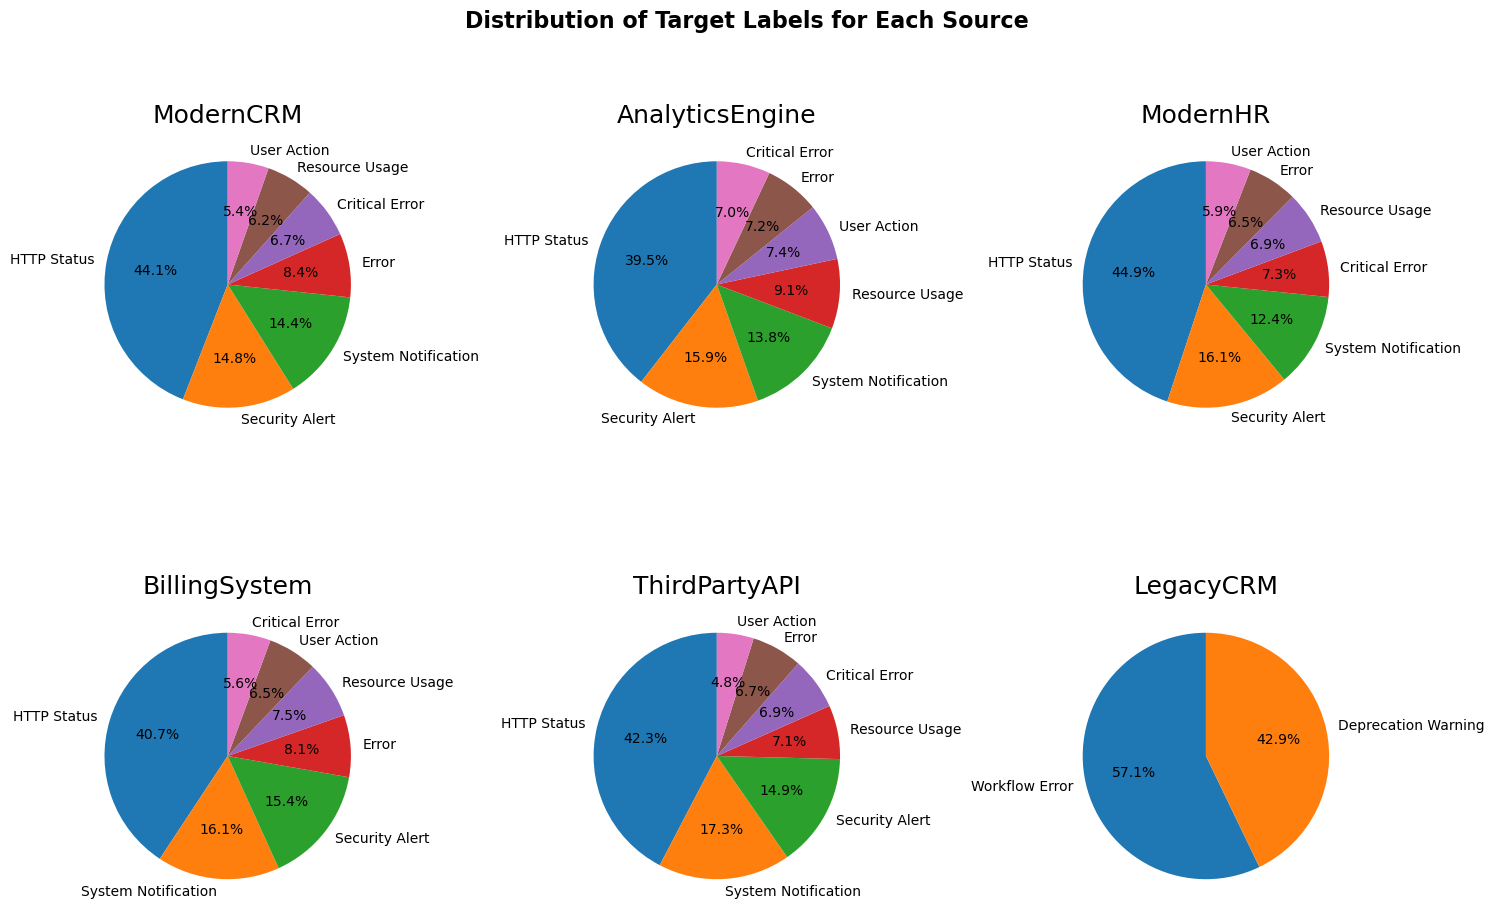

In [12]:
sources = df['source'].unique()
n_sources = len(sources)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust grid for your 6 sources
axes = axes.flatten()

for i, src in enumerate(sources):
    subset = df[df['source'] == src]['target_label'].value_counts()
    axes[i].pie(subset.values, labels=subset.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{src}', fontsize=18)

# Hide unused subplots if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Distribution of Target Labels for Each Source', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [13]:
target_list = df.target_label.unique()
print(target_list)
print("\nNumber of classes : ", len(target_list), "\n")

['HTTP Status' 'Critical Error' 'Security Alert' 'Error'
 'System Notification' 'Resource Usage' 'User Action' 'Workflow Error'
 'Deprecation Warning']

Number of classes :  9 



In [14]:
df.target_label.value_counts()

target_label
HTTP Status            1017
Security Alert          371
System Notification     356
Error                   177
Resource Usage          177
Critical Error          161
User Action             144
Workflow Error            4
Deprecation Warning       3
Name: count, dtype: int64

From the results of the above few cells we can observe that : Workflow Error and Deprecation Warning classes messages arise from LegacyCRM source.

In [15]:
for target in target_list:
    print('Target Label : ', target)
    print(df[df['target_label'] == target].source.value_counts(), '\n')

Target Label :  HTTP Status
source
ModernHR           221
ThirdPartyAPI      210
ModernCRM          205
BillingSystem      195
AnalyticsEngine    186
Name: count, dtype: int64 

Target Label :  Critical Error
source
ModernHR           36
ThirdPartyAPI      34
AnalyticsEngine    33
ModernCRM          31
BillingSystem      27
Name: count, dtype: int64 

Target Label :  Security Alert
source
ModernHR           79
AnalyticsEngine    75
ThirdPartyAPI      74
BillingSystem      74
ModernCRM          69
Name: count, dtype: int64 

Target Label :  Error
source
ModernCRM          39
BillingSystem      39
AnalyticsEngine    34
ThirdPartyAPI      33
ModernHR           32
Name: count, dtype: int64 

Target Label :  System Notification
source
ThirdPartyAPI      86
BillingSystem      77
ModernCRM          67
AnalyticsEngine    65
ModernHR           61
Name: count, dtype: int64 

Target Label :  Resource Usage
source
AnalyticsEngine    43
BillingSystem      36
ThirdPartyAPI      35
ModernHR          

It can be seen that all log classes have equal source distributions except Workflow Error and Deprecation Warning.

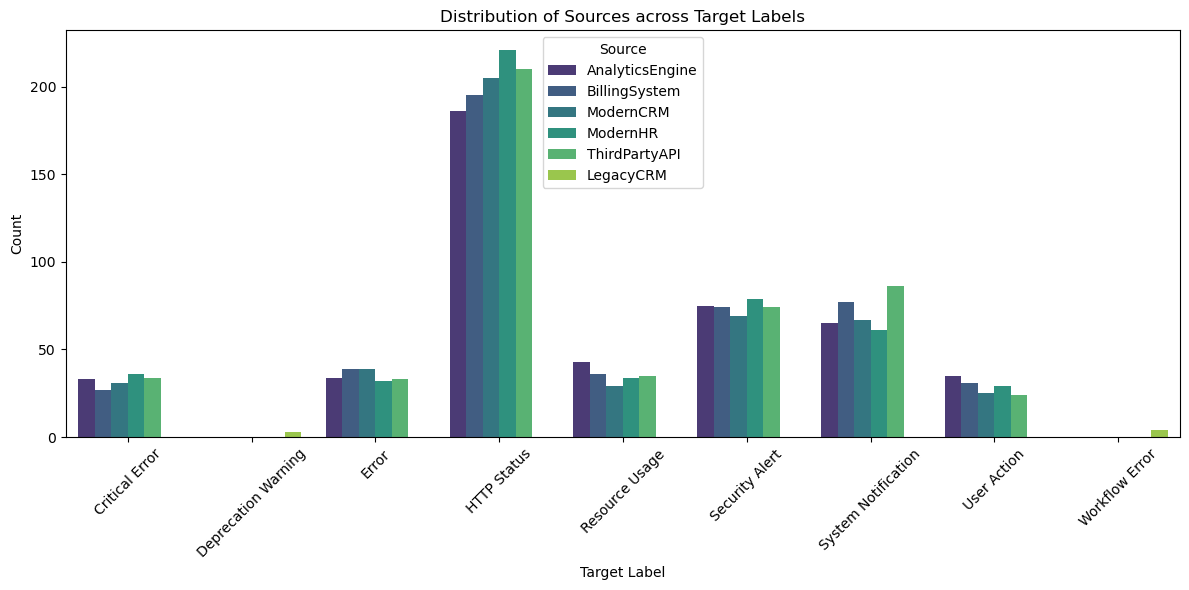

In [16]:
# Group by and reset index for plotting
target_source_counts = df.groupby(['target_label', 'source']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.barplot(
    data=target_source_counts,
    x='target_label',
    y='count',
    hue='source',
    palette='viridis'
)
plt.title('Distribution of Sources across Target Labels')
plt.xlabel('Target Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Source')
plt.tight_layout()
plt.show()

In [17]:
# df.complexity.unique()

In [18]:
# df.complexity.value_counts()

Now let's try to identify an patterns in log messages of different TARGET LABELS

In [19]:
pd.set_option('display.max_rows', None)

# df[(df['complexity'] == 'regex') & (df['target_label'] == 'User Action')]


In [20]:
df[df['target_label'] == 'System Notification']['log_message']

7       File data_6169.csv uploaded successfully by us...
14      File data_3847.csv uploaded successfully by us...
15                         Backup completed successfully.
30                 Backup started at 2025-05-14 07:06:55.
36               System reboot initiated by user User243.
44                 Backup started at 2025-02-15 20:00:19.
48      File data_7366.csv uploaded successfully by us...
50                       System updated to version 3.9.1.
52                         Backup completed successfully.
54                         Backup completed successfully.
81                         Backup completed successfully.
83                         Backup completed successfully.
92               System reboot initiated by user User471.
96                   Disk cleanup completed successfully.
99                         Backup completed successfully.
108                  Backup ended at 2025-08-08 13:06:23.
114                        Backup completed successfully.
128           

<h4>It is clear that System Notification class log messages are of some patterns</h4>


In [21]:
df[df['target_label'] == 'User Action']['log_message']

18      Account with ID 5351 created by User634.
27                      User User685 logged out.
57                       User User395 logged in.
85                       User User225 logged in.
88                      User User494 logged out.
122     Account with ID 7813 created by User373.
126                      User User900 logged in.
205     Account with ID 9827 created by User965.
211                     User User272 logged out.
214                     User User706 logged out.
219                     User User881 logged out.
220                     User User313 logged out.
256                     User User641 logged out.
259     Account with ID 2520 created by User546.
273     Account with ID 2300 created by User964.
312                      User User799 logged in.
319                      User User496 logged in.
321                      User User617 logged in.
332     Account with ID 7505 created by User322.
348                     User User907 logged out.
351                 

<h4>It is clear that User Action class log messages are of :</h4>
<h5>User UserXXX logged out/in.</h5>
<h5>Account with ID XXX created by UserYYY.</h5>

In [22]:
df[df['target_label'] == 'Deprecation Warning']['log_message']

255     API endpoint 'getCustomerDetails' is deprecate...
1734    The 'ExportToCSV' feature is outdated. Please ...
1826    Support for legacy authentication methods will...
Name: log_message, dtype: object

In [23]:
df[df['target_label'] == 'HTTP Status']['log_message']

0       nova.osapi_compute.wsgi.server [req-b9718cd8-f...
3       nova.osapi_compute.wsgi.server [req-4895c258-b...
4       nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...
5       nova.osapi_compute.wsgi.server [req-f0bffbc3-5...
9       nova.osapi_compute.wsgi.server [req-2bf7cfee-a...
12      nova.osapi_compute.wsgi.server [req-d4f8d0c2-4...
16      nova.osapi_compute.wsgi.server [req-6fe0e366-f...
17      nova.osapi_compute.wsgi.server [req-5f1c2027-e...
19      nova.osapi_compute.wsgi.server [req-945d1f31-a...
20      nova.osapi_compute.wsgi.server [req-033d97b9-6...
21      nova.osapi_compute.wsgi.server [req-75bc6269-8...
23      nova.osapi_compute.wsgi.server [req-077c3c87-b...
24      nova.osapi_compute.wsgi.server [req-4e83daf7-a...
25      nova.osapi_compute.wsgi.server [req-bfce366e-9...
28      nova.osapi_compute.wsgi.server [req-5e6e042b-f...
31      nova.metadata.wsgi.server [-] 10.11.21.138,10....
33      nova.osapi_compute.wsgi.server [req-fe9ef402-d...
37      nova.m

In [24]:
df['log_message'][0]

'nova.osapi_compute.wsgi.server [req-b9718cd8-f65e-49cc-8349-6cf7122af137 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" status: 200 len: 1893 time: 0.2675118'

Here, the log messages of HTTP Status almost all start with "nova" but the random text inside the square brackets are different and are of random without any particular pattern

In [25]:
df[df.log_message.str.startswith('nova.osapi')].target_label.value_counts()

target_label
HTTP Status    809
Name: count, dtype: int64

In [26]:
df[df.log_message.str.startswith('nova.metadata')].target_label.value_counts()

target_label
HTTP Status    208
Name: count, dtype: int64

For this class lets try to use embeddings so that through semantic search we can label new logs easily

In [27]:
# df[df['target_label'] == 'Security Alert']['log_message']
# df[df['target_label'] == 'Error']['log_message']
# df[df['target_label'] == 'Critical Error']['log_message']
df[df['target_label'] == 'Resource Usage']['log_message']  

8       nova.compute.claims [req-a07ac654-8e81-416d-bf...
22      nova.compute.resource_tracker [req-addc1839-2e...
26      nova.compute.claims [req-d6986b54-3735-4a42-90...
40      nova.compute.claims [req-72b4858f-049e-49e1-b3...
58      nova.compute.claims [req-5c8f52bd-8e3c-41f0-95...
61      nova.compute.claims [req-d38f479d-9bb9-4276-96...
64      nova.compute.claims [req-d82fab16-60f8-4c9f-bd...
82      nova.compute.resource_tracker [req-addc1839-2e...
109     nova.compute.claims [req-868a5460-dbb6-416b-b4...
120     nova.compute.resource_tracker [req-addc1839-2e...
138     nova.compute.claims [req-2d658d2c-7eff-414e-a6...
152     nova.compute.claims [req-29a09cdb-3169-4c40-8b...
153     nova.compute.resource_tracker [req-addc1839-2e...
177     nova.compute.claims [req-9118475d-6e72-48fa-9d...
181     nova.compute.claims [req-4b4dd551-26d8-48e2-bd...
186     nova.compute.claims [req-d82fab16-60f8-4c9f-bd...
197     nova.compute.claims [req-9118475d-6e72-48fa-9d...
238     nova.c

In [28]:
df['log_message'][8]

'nova.compute.claims [req-a07ac654-8e81-416d-bfbb-189116b07969 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] [instance: bf8c824d-f099-4433-a41e-e3da7578262e] Total memory: 64172 MB, used: 512.00 MB'

The Log messages related to Resource Usage are bit similar to HTTP Status
i.e., starts with nove but have different words like compute claims and finishes with the random message


The following observations have been developed based on the above EDA:

-> Logs from 'Legacy CRM' source belong to eith 'Workflow Error' or 'Deprecation Warning' classes.

-> 'User Action' and 'System Notification' logs can be classified using regex patterns.

->Now we need to focus on the remaining classes to identify patterns and then to classify new logs based on this data.

<h2>Clustering</h2>

In [29]:
#!pip install sentence_transformers

In [30]:
from sklearn.cluster import DBSCAN
from sentence_transformers import SentenceTransformer  ##Sentence Level Embedding

In [31]:
model = SentenceTransformer('all-MiniLM-L6-v2', use_auth_token=False)  # Lightweight embedding model
embeddings = model.encode(df['log_message'].tolist())    #Converting all the log messages into embeddings.

C:\Users\bvish\anaconda3\Lib\site-packages\sentence_transformers\SentenceTransformer.py:204: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v4 of SentenceTransformers.
  warnings.warn(


In [32]:
print(embeddings)
print(type(embeddings))
print(embeddings.shape)

[[-0.10293972  0.03354599 -0.02202604 ...  0.00457789 -0.04259715
   0.00322623]
 [ 0.00804573 -0.03573925  0.04938737 ...  0.01538317 -0.06230951
  -0.02774668]
 [-0.00908224  0.13003926 -0.05275577 ...  0.02014109 -0.05117095
  -0.02930295]
 ...
 [-0.04022273  0.04224358 -0.06610426 ...  0.02363658 -0.00530874
   0.02044456]
 [-0.03603451  0.01960894  0.10052759 ...  0.03668106 -0.02487848
  -0.00578847]
 [ 0.01457428  0.04911829 -0.0030135  ...  0.01029743 -0.00068491
   0.00708856]]
<class 'numpy.ndarray'>
(2410, 384)


In [33]:
# help(DBSCAN)

In [34]:
clustering = DBSCAN(eps=0.2, min_samples=3, metric='cosine').fit(embeddings)

In [35]:
df1 = df.copy()
df1.head()

,timestamp,source,log_message,target_label,complexity
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert


In [36]:
df1['cluster'] = clustering.labels_
df1.head()

,timestamp,source,log_message,target_label,complexity,cluster
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,76
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0


In [37]:
df1.cluster.unique()

array([ 0,  1, 76,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, -1, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50, 51, 52, 53, 74, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 77], dtype=int64)

In [38]:
print("Number of CLusters : ", df1.cluster.nunique())

Number of CLusters :  79


In [39]:
# Applying pandas groupby function on classes to inspect pattern of each class
clusters = df1.groupby('cluster')['log_message'].apply(list)
sorted_clusters = clusters.sort_values(key=lambda x: x.map(len), ascending=False)

In [40]:
sorted_clusters[77]

['Potential vulnerability exploit detected from 192.168.96.60',
 'Potential vulnerability exploit detected from 192.168.52.4',
 'Potential vulnerability exploit detected from 192.168.152.25']

In [41]:
print("Clustered Patterns:")
cnt = 0
for cluster_id, messages in sorted_clusters.items():
    if len(messages) > 10:
        cnt += 1
        print(f"\nCluster {cluster_id}:")
        for msg in messages[:3]:
            print(f"  {msg}")
print("\nClusters with atleast 10 messages : ", cnt)

Clustered Patterns:

Cluster 0:
  nova.osapi_compute.wsgi.server [req-b9718cd8-f65e-49cc-8349-6cf7122af137 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" status: 200 len: 1893 time: 0.2675118
  nova.osapi_compute.wsgi.server [req-4895c258-b2f8-488f-a2a3-4fae63982e48 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" HTTP status code -  200 len: 211 time: 0.0968180
  nova.osapi_compute.wsgi.server [req-ee8bc8ba-9265-4280-9215-dbe000a41209 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" RCODE  200 len: 1874 time: 0.2280791

Cluster 4:
  nova.compute.claims [req-a07ac654-8e81-416d-bfbb-189116b07969 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] [instance: bf8c82

In [42]:
print("Clustered Patterns:")
cnt = 0
for cluster_id, messages in sorted_clusters.items():
    if len(messages) < 10:
        cnt += 1
        print(f"Cluster {cluster_id}:")
        for msg in messages[:3]:
            print(f"  {msg}")
    
print(cnt)

Clustered Patterns:
Cluster 27:
  Detection of admin privilege misuse by user 1449
  Detection of potential admin privilege abuse by user 2182
  Admin privilege misuse detected for user 8854
Cluster 41:
  Server 48 suffered an abrupt restart during data import
  Server 39 suffered an abrupt restart during data import
  Server 6 suffered an abrupt restart during data import
Cluster 68:
  Server 48 went down unexpectedly while data was being synced
  Server 1 had an unexpected interruption during data synchronization
  Server 11 had an unexpected interruption during data synchronization
Cluster 55:
  IP 192.168.45.67 flagged for potential security threat
  IP 192.168.87.42 flagged for potential cyber threat
  IP 192.168.237.233 flagged for potential security threat
Cluster 33:
  API security system detected suspicious activity from user 9593
  API security system detected suspicious activity from user 4239
  API security breach attempt identified for user 2027
Cluster 62:
  Server 21 exp

In [43]:
#clusters[65]

<h3>Regex Classification</h3>

Through our observation we found that logs belonging "User Action" and "System Notification" classes have very few patterns.

So through the help of REGULAR EXPRESSIONS we can check whether they belong to these classes or not, if not we will proceed them further.

In [44]:
import re

In [45]:
def classify_with_regex(log_message):
    regex_patterns = {
        r"User User\d+ logged (in|out).": "User Action",
        r"Backup (started|ended) at .*": "System Notification",
        r"Backup completed successfully.": "System Notification",
        r"System updated to version .*": "System Notification",
        r"File .* uploaded successfully by user .*": "System Notification",
        r"Disk cleanup completed successfully.": "System Notification",
        r"System reboot initiated by user .*": "System Notification",
        r"Account with ID .* created by .*": "User Action"
    }
    for pattern, label in regex_patterns.items():
        if re.search(pattern, log_message):
            return label
    return None

In [46]:
classify_with_regex("User User123 logged in.")

'User Action'

In [47]:
classify_with_regex("User123 logged in.")

In [48]:
classify_with_regex("Who won the match")

In [49]:
classify_with_regex("System reboot initiated by user User179.")

'System Notification'

In [50]:
classify_with_regex("System reboot initiated by logged out")

In [51]:
classify_with_regex("Account with ID  created by")

In [52]:
# Apply regex classification
df1['regex_label'] = df1['log_message'].apply(lambda x: classify_with_regex(x))
df1[df1['regex_label'].notnull()]

,timestamp,source,log_message,target_label,complexity,cluster,regex_label
7,10/11/2025 8:44,ModernHR,File data_6169.csv uploaded successfully by us...,System Notification,regex,3,System Notification
14,1/4/2025 1:43,ThirdPartyAPI,File data_3847.csv uploaded successfully by us...,System Notification,regex,3,System Notification
15,5/1/2025 9:41,ModernCRM,Backup completed successfully.,System Notification,regex,7,System Notification
18,2/22/2025 17:49,ModernCRM,Account with ID 5351 created by User634.,User Action,regex,8,User Action
27,9/24/2025 19:57,ThirdPartyAPI,User User685 logged out.,User Action,regex,10,User Action
30,4/26/2025 7:54,AnalyticsEngine,Backup started at 2025-05-14 07:06:55.,System Notification,regex,12,System Notification
36,11/19/2025 13:14,BillingSystem,System reboot initiated by user User243.,System Notification,regex,15,System Notification
44,6/20/2025 0:53,BillingSystem,Backup started at 2025-02-15 20:00:19.,System Notification,regex,12,System Notification
48,7/1/2025 9:43,ModernHR,File data_7366.csv uploaded successfully by us...,System Notification,regex,3,System Notification
50,1/16/2025 21:45,ThirdPartyAPI,System updated to version 3.9.1.,System Notification,regex,20,System Notification


In [53]:
df1[(df1['target_label']=='System Notification') | (df1['target_label']=='User Action')].regex_label.value_counts()

regex_label
System Notification    356
User Action            144
Name: count, dtype: int64

So we can conclude that through RE we were able to identify logs belonging to 'System Notification' and 'User Action' classes

In [54]:
df1[df1['regex_label'].isnull()].head(10)

,timestamp,source,log_message,target_label,complexity,cluster,regex_label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0,None
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1,None
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,76,None
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0,None
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0,None
5,2025-10-09 10:30:31,ModernHR,nova.osapi_compute.wsgi.server [req-f0bffbc3-5...,HTTP Status,bert,0,None
6,3/1/2025 19:14,ModernHR,Shard 6 replication task ended in failure,Error,bert,2,None
8,2025-02-12 10:42:29,ThirdPartyAPI,nova.compute.claims [req-a07ac654-8e81-416d-bf...,Resource Usage,bert,4,None
9,2025-03-30 04:01:45,ModernHR,nova.osapi_compute.wsgi.server [req-2bf7cfee-a...,HTTP Status,bert,0,None
10,8/9/2025 18:58,ModernCRM,Email server encountered a sending fault,Error,bert,1,None


Now let's consider logs that doesn't belong to above classes and use a Classification model to classify.

In [55]:
df_non_regex = df1[df1['regex_label'].isnull()].copy()
df_non_regex.shape

(1910, 7)

Also the messages belonging to source 'Legacy CRM' are very low compared to other classes. 

So let's remove the rows belonging to Legacy CRM source and treat them seperately.

In [56]:
df_legacy = df_non_regex[df_non_regex.source=="LegacyCRM"]
df_non_legacy = df_non_regex[df_non_regex.source!="LegacyCRM"]

In [57]:
df_non_legacy.shape

(1903, 7)

In [58]:
df_non_legacy.head()

,timestamp,source,log_message,target_label,complexity,cluster,regex_label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0,None
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1,None
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,76,None
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0,None
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0,None


In [59]:
# using the same embeddings model
embeddings_filtered = model.encode(df_non_legacy['log_message'].tolist())

In [60]:
##Splitting the data for target variable and the feature variable
X = embeddings_filtered
y = df_non_legacy['target_label'].values

In [61]:
print("Shape of X : ", X.shape)
print("Shape of y : ", y.shape)

Shape of X :  (1903, 384)
Shape of y :  (1903,)


In [62]:
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
# clf = LogisticRegression(max_iter=1000)
# clf.fit(X_train, y_train)

In [119]:
# y_pred = clf.predict(X_test)
# report = classification_report(y_test, y_pred)
# print(report)

In [120]:
# print(accuracy_score(y_test, y_pred))

In [121]:
# tree_clf = DecisionTreeClassifier()

# tree_clf.fit(X_train, y_train)

In [122]:
# y_pred_tree = tree_clf.predict(X_test)
# tree_report = classification_report(y_test, y_pred_tree)
# print(tree_report)

In [123]:
# for_clf = RandomForestClassifier()

# for_clf.fit(X_train, y_train)

In [125]:
# y_pred_for = for_clf.predict(X_test)
# for_report = classification_report(y_test, y_pred_for)
# print(for_report)

In [64]:
model = SVC(kernel='rbf', C=1, gamma='scale', probability=True)

In [65]:
model.fit(X_train, y_train)

SVC(C=1, probability=True)

In [66]:
y_pred= model.predict(X_test)
svm_report = classification_report(y_test, y_pred)
print(svm_report)

                precision    recall  f1-score   support

Critical Error       0.97      1.00      0.99        35
         Error       1.00      0.96      0.98        27
   HTTP Status       1.00      1.00      1.00       197
Resource Usage       1.00      1.00      1.00        35
Security Alert       1.00      1.00      1.00        87

      accuracy                           1.00       381
     macro avg       0.99      0.99      0.99       381
  weighted avg       1.00      1.00      1.00       381



Our model is working pretty well and let's use this model for classifying new messages.

In [129]:
# knn = KNeighborsClassifier()

# knn.fit(X_train, y_train)

# knn_model = knn.predict(X_test)
# knn_rep = classification_report(y_test, knn_model)
# print(knn_rep)

In [67]:
import joblib
joblib.dump(model, 'log_classifier_svm.joblib')

['log_classifier_svm.joblib']

In [68]:
from joblib import load
obj = load('log_classifier_svm.joblib')
print(type(obj))

<class 'sklearn.svm._classes.SVC'>
